## código utilizado para a construção e análise da série temporal

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
dados_completos=pd.read_csv('airline-passengers.csv') #carregando os dados para análise das series temporais

In [3]:
#visualizando todo o dataset
dados_completos.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#verificando as características de todo o dataset
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
#ajustando o dataset para criar uma coluna do tipo "data" 
dados_completos['datetime'] =pd.to_datetime(dados_completos['Month'])

In [6]:
dados_completos.head()

,Month,Passengers,datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [7]:
#verificando a nova característica do nosso dataset (coluna "datatime")
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    object        
 1   Passengers  144 non-null    int64         
 2   datetime    144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [8]:
type(dados_completos)  #verificando o tipo de dados

pandas.core.frame.DataFrame

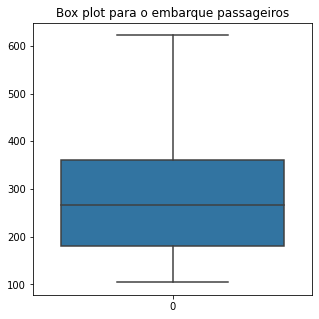

In [9]:
#verificando se existem outliers
plt.figure(figsize=(5, 5));
g = sns.boxplot(data=dados_completos['Passengers']);  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para o embarque passageiros');

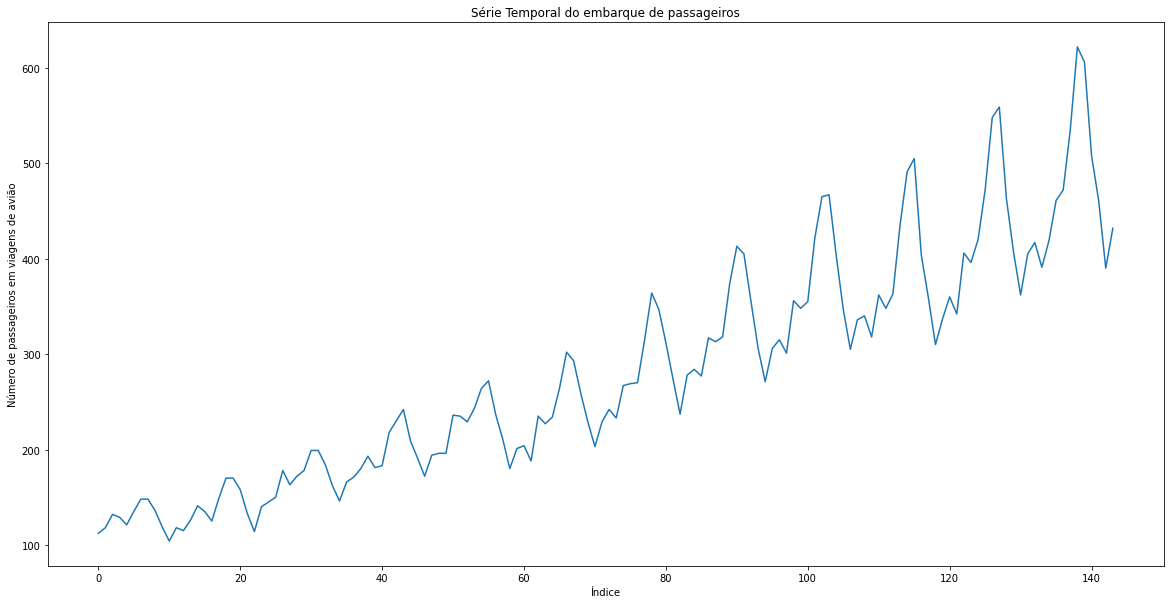

In [10]:
#plotando o gráfico da variação da pressão atmosférica no período
plt.figure(figsize=(20, 10));
g = sns.lineplot(x=dados_completos.index,y=dados_completos['Passengers'])
g.set_title('Série Temporal do embarque de passageiros')
g.set_xlabel('Índice')
g.set_ylabel('Número de passageiros em viagens de avião');

In [11]:
#realizando a decomposição da série temporal 
from statsmodels.tsa.seasonal import seasonal_decompose  #biblioteca responsável por realizar a decomposição da série temporal

In [12]:
#modificando o indice para ser temporal
df_serie_temporal=dados_completos.set_index('datetime')

In [13]:
#verifica as colunas existentes
df_serie_temporal.columns

Index(['Month', 'Passengers'], dtype='object')

In [14]:
#realiza o drop da coluna 'month'
df_serie_temporal.drop('Month',axis=1,inplace=True)

In [15]:
#verifica o novo dataset
df_serie_temporal.head()

,Passengers
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [16]:
df_serie_temporal.columns

Index(['Passengers'], dtype='object')

In [17]:
#realizando a construção do modelo de decomposição da série temporal
decomposicao_aditiva = seasonal_decompose(df_serie_temporal, model='aditive',extrapolate_trend='freq')   #aplica o modelo de decomposição aditiva

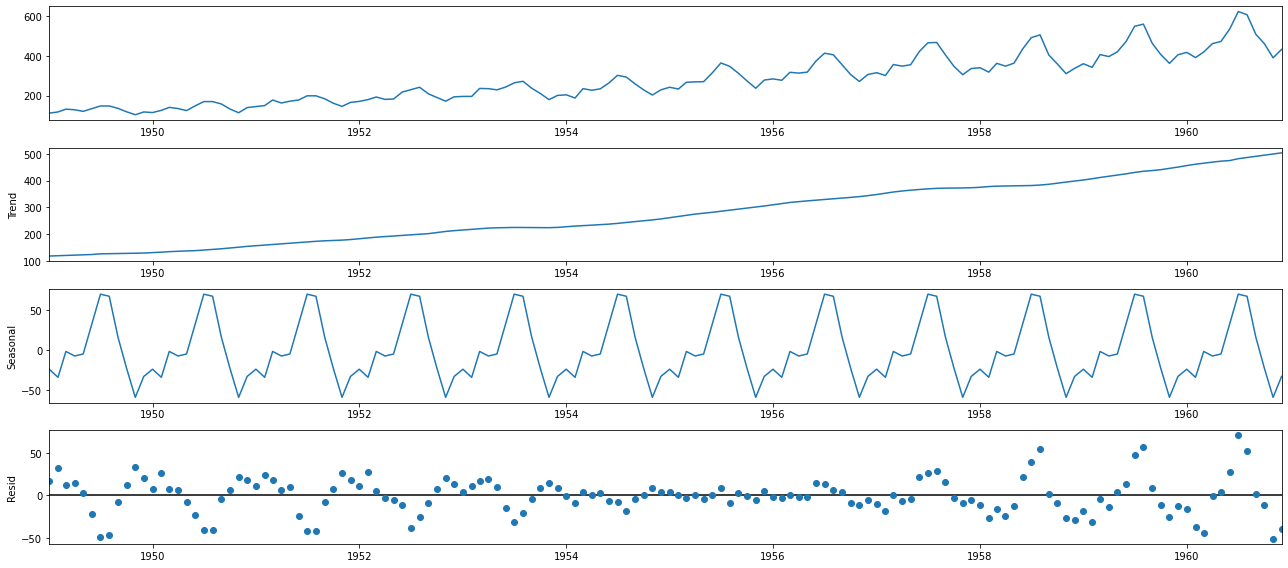

In [18]:
#realiza o plot da decomposição
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
fig=decomposicao_aditiva.plot()  #realiza o plot da decomposição
plt.show()

In [19]:
#testando a estacionariedade da série temporal
from statsmodels.tsa.stattools import adfuller  #importando o teste ADF 

In [20]:
resultado_ADF = adfuller(df_serie_temporal.Passengers.values, autolag='AIC')  #aplica o teste adf
# para o teste ADF a hipótese nula é que existe, pelo menos, uma raiz negativa na série temporal (série é não-estacionária)

In [21]:
print('ADF P-valor:',resultado_ADF[1] )  # com o p-valor maior que 0,05 a hipótese nula não é rejeitada

ADF P-valor: 0.9918802434376409


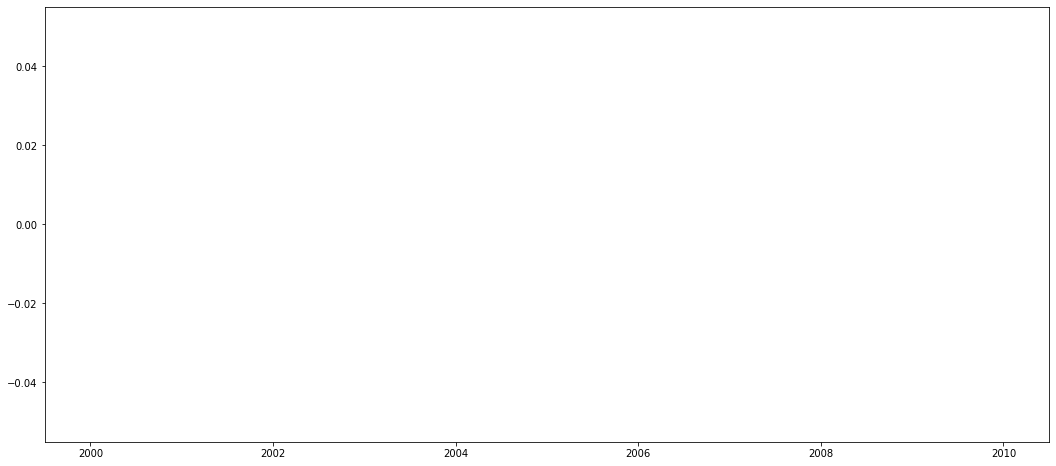

In [22]:
#retirando a tendência da nossa série
detrended = df_serie_temporal - decomposicao_aditiva.trend
plt.plot(detrended);

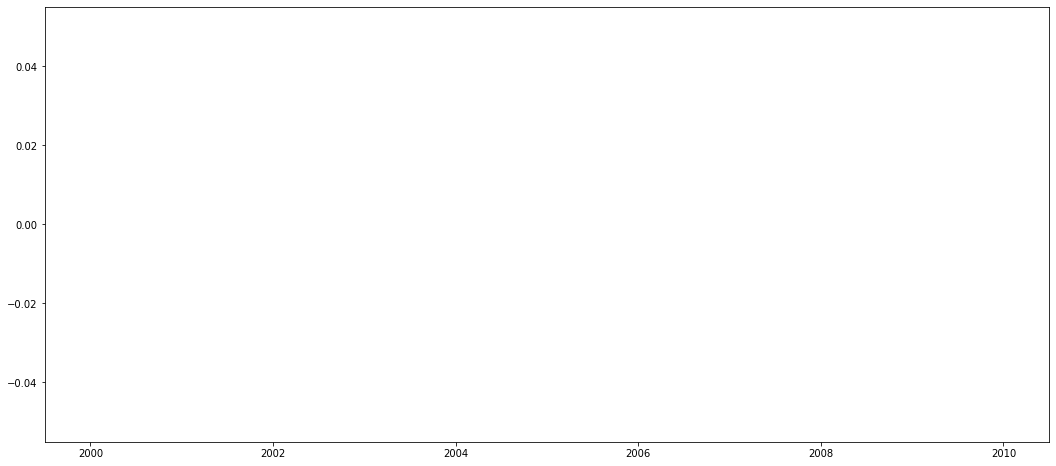

In [23]:
#retirando a sazonalidade
deseasonalized = df_serie_temporal - decomposicao_aditiva.seasonal
plt.plot(deseasonalized);

In [24]:
#realizando a análise de autocorrelação nos dados
from statsmodels.graphics.tsaplots import plot_acf   #importando a biblioteca para o plot da autocorrelação

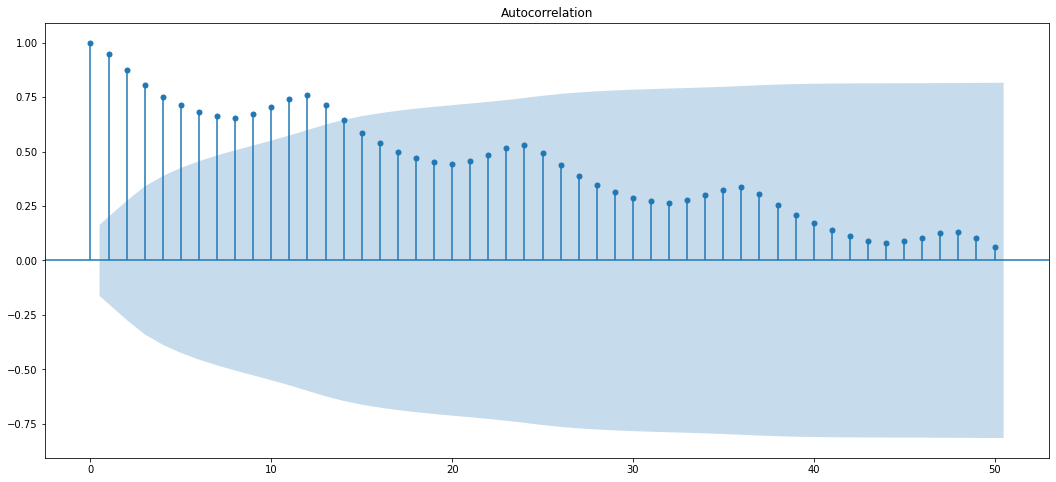

In [25]:
plot_acf(df_serie_temporal, lags=50)  #aplica a autocorrelação entre os dados
plt.show()  #mostra uma correlação significativa com 14 lags

**Aplicando as Redes Neurais Recorrentes**

In [ ]:
#Transformando a série em estacionária
df_serie_temporal['Passengers_diff'] = df_serie_temporal['Passengers'] - df_serie_temporal['Passengers'].shift(1)  #aplica o primeiro "Shift" (derivada para tempo discreto)
df_serie_temporal['Passengers_diff']=df_serie_temporal['Passengers_diff'].dropna()  #retira os valores nulos
df_serie_temporal['Passengers_diff'].plot()

In [ ]:
#bibliotecas utilizadas para a construção dos modelos de previsão de vendas de passagens
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
#volta o dataset para o formato original
serie_passageiros=df_serie_temporal['Passengers'].values

In [ ]:
# normalizzação do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
dataset = scaler.fit_transform(serie_passageiros.reshape(-1, 1)) # aplica a escala

In [ ]:
print(dataset)

In [ ]:
# Divide o conjunto de dados em treinamento e teste 
train_size = int(len(dataset) * 0.67)  #encontra o valor máximo para o treinamento
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test)) #tamanho do df para treinamento e teste

In [ ]:
#Cria a matriz necessária para a entrada de dados 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#cria o reshape para que os dados estejam em um formato ideal para entrada
look_back = 14  # será utilizado apenas um passo anterior para a previsão do futuro
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainX.shape

In [ ]:
# cria o modelo utilizando redes recorrentes e o LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#apresenta a arquitetura da rede
model.summary()

In [ ]:
#realiza o treinamento o modelo de previsão
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [ ]:
# realiza as previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# coloca os dados no formato original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# Realiza a mudança dos dados para a previsão
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift para os dados de teste
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# Realiza o plot dos dados de previsão e o real
plt.plot(scaler.inverse_transform(dataset),label='Dataset')
plt.plot(trainPredictPlot, label='Treinamento')
plt.plot(testPredictPlot,label='Previsão')
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.legend()
plt.show()